<div class="markdown-google-sans">

# **Collect Speechocean762 Dataset for Pronunciation Evaluation 🤗**

Collect Speechocean762 Dataset Sentence Level Scoring for Pronunciation Evaluation.

</div>


<div class="markdown-google-sans">

## **Information 😲**
</div>

**Title:** Collect Speechocean762 Dataset for Pronunciation Evaluation <br>
**Description:** Collect Speechocean762 Dataset Sentence Level Scoring for Pronunciation Evaluation<br>
**Code Writer:** Hafid Ikhsan Arifin<br>
**Date created:** 2023/07/06<br>
**Last modified:** 2023/07/14 (9:30 PM)<br> <!-- Edit Here -->
**Version:** 4.4.0<br> <!-- Edit Here -->

**Dataset version:**

<!-- Edit Here -->
| Version | Type                   | Used | Hub  |
|---------| ---------------------- | ---- | ---- |
| 1       | Real (Unbalance)       |  ✅  |  ✅  |
| 2       | Undersampling          |  ✅  |  ✅  |
| 3       | Oversampling Augmented |  ✅  |  ✅  |
| 4       | Oversampling Duplicate |  ✅  |  ✅  |

**Notebook:**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ThwDqtAciWo19mZhMZ-XkBMGZZrdSptE?usp=sharing)
[![GitHub watchers](https://img.shields.io/github/watchers/Naereen/StrapDown.js.svg?style=social&label=Watch&maxAge=2592000)](https://github.com/IELTSSpeakingApplication/MachineLearning)



**Dataset:**

[![Open in Spaces](https://huggingface.co/datasets/huggingface/badges/raw/main/open-in-hf-spaces-sm.svg)](https://huggingface.co/hafidikhsan)



<div class="markdown-google-sans">

## **Introduction 🤔**
</div>

[Speechocean 762](https://github.com/jimbozhang/speechocean762) is a non-native English corpus for pronunciation scoring task. This corpus consists of 5000 English sentences. All the speakers are non-native, and their mother tongue is Mandarin. Half of the speakers are Children, and the others are adults. The pronunciation quality scores might be given at phoneme-level, word-level, and sentence-level for a typical pronunciation scoring task. Five experts made the scores. For this task, I use sentence-level for pronunciation quality scores. To avoid subjective bias, each expert scores independently under the same metric. In sentence-level pronunciation quality scores, the score is divided into 5 assessments accuracy, fluency, completeness, prosodic, and total. In this task, I will use total feature. In total feature, score range is from 0 to 10. But because the data obtained there are several class labels that are empty, so to make classification easier, I will divide them into 4 classes from range:

*   9-10 (Proficient)
*   7-8 (Advanced)
*   5-6 (Intermediate)
*   0-4 (Beginner)

Original dataset is available from [Github](https://github.com/jimbozhang/speechocean762) or [Hugging Face Hub Datasets](https://huggingface.co/datasets/jbpark0614/speechocean762).

The [Speechocean 762](https://github.com/jimbozhang/speechocean762) dataset is unbalance, so to get better model preformance I will create 4 version dataset that is `Real` dataset (unbalance), balance the dataset with `Undersampling`, `Oversampling Augmented`, and `Oversampling Duplicate`. The following are the steps that I will take to create the dataset.

1.   Load original dataset
2.   Remove unnecessary column
3.   Merge training and testing dataset
4.   Sort dataset
5.   Categorize dataset
6.   Clean dataset
7.   Cast label column
8.   Add audio duration column
9.   Filter data that have duration under 10
10.  Trim the over duration audio data
11.  Filter the over duration audio data that have duration under 10 after triming
12.  Merge original data and trim data
13.  Get data in each class (For `Undersampling`, `Oversampling Augmented`, and `Oversampling Duplicate`)
14.  Sampling dataset (For `Undersampling`, `Oversampling Augmented`, and `Oversampling Duplicate`)
15.  Shuffle dataset
16.  Show dataset information
17.  Show random data
18.  Visualize dataset
19.  Push dataset to Hugging Face Hub

This dataset will be available in my Hugging Face Hub profile [hafidikhsan](https://huggingface.co/hafidikhsan).

Let's code 😋



<div class="markdown-google-sans">

## **Preparation 🧐**
</div>

The first step I will do is install required library. Thanks to [Jungbae Park](https://huggingface.co/jbpark0614), because now [Speechocean 762](https://github.com/jimbozhang/speechocean762) is available in [Hugging Face Hub Datasets](https://huggingface.co/datasets/jbpark0614/speechocean762). I will use this dataset from [Hugging Face Hub Datasets](https://huggingface.co/datasets/jbpark0614/speechocean762). To use this dataset, first I must install [datasets](https://huggingface.co/docs/datasets/index) library from Hugging Face.

In [1]:
# Install required library
%%capture
!pip install datasets
!pip install audiomentations

In [2]:
#@title Check installed library
import datasets
import audiomentations

try:
    datasets_version = datasets.__version__
    audiomentations_version = audiomentations.__version__
    print("Libraries installed")
except:
    print("Libraries not installed")

Libraries installed


Next, I will import required libraries.

In [3]:
# Import library
import random
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from huggingface_hub import notebook_login
from datasets import load_dataset, concatenate_datasets, ClassLabel
from audiomentations import AirAbsorption, AddGaussianNoise, Limiter, Trim

To make the process easier, I will define some global parameters for creating dataset.

In [4]:
# Global parameters
HUGGING_FACE_DATASET = "jbpark0614/speechocean762"

KEY_COLUMN = "total_score"
AUDIO_COLUMN = "audio"
TEXT_COLUMN = "text"
LABEL_COLUMN = "label"
DUR_COLUMN = "duration"

HUGGING_FACE_REMOVE_COLUMN = []

TARGET_HUGGING_FACE_DATASET_NAME = "speechocean762-totalscore-oversampling-duplicate"
PRIVATE = True

<div class="markdown-google-sans">

## **Preprocessing 🤯**
</div>

First thing I do before create dataset is load the dataset from [Hugging Face Hub Datasets](https://huggingface.co/datasets/jbpark0614/speechocean762). To load dataset I use [`load_dataset`](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/loading_methods#datasets.load_dataset) function from [datasets](https://huggingface.co/docs/datasets/index) library from Hugging Face.

In [5]:
# Load Speechocean762 dataset
dataset = load_dataset(HUGGING_FACE_DATASET)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/2500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2500 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/jbpark0614___parquet/jbpark0614--speechocean762-0e10dcc3bf310055/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
# Show dataset information
dataset

DatasetDict({
    train: Dataset({
        features: ['index', 'speaker_id_str', 'speaker_id', 'question_id', 'total_score', 'accuracy', 'completeness', 'fluency', 'prosodic', 'text', 'audio', 'path'],
        num_rows: 2500
    })
    test: Dataset({
        features: ['index', 'speaker_id_str', 'speaker_id', 'question_id', 'total_score', 'accuracy', 'completeness', 'fluency', 'prosodic', 'text', 'audio', 'path'],
        num_rows: 2500
    })
})

For my task, I only use `total_score` column information for pronunciation evaluation on sentence level scoring. So I will remove some column that unrelated to my task. I only use `total_score`, `audio`, and `text` column. To remove some column I use [`remove_columns`](https://huggingface.co/docs/datasets/v2.13.1/en/stream#remove) function from [datasets](https://huggingface.co/docs/datasets/index) library from Hugging Face.

In [7]:
# Find unnecessary column
for x, y in dataset.column_names.items():
    if x == "train":
        HUGGING_FACE_REMOVE_COLUMN = y

        # Remove audio, text and total_score column
        HUGGING_FACE_REMOVE_COLUMN.remove(KEY_COLUMN)
        HUGGING_FACE_REMOVE_COLUMN.remove(AUDIO_COLUMN)
        HUGGING_FACE_REMOVE_COLUMN.remove(TEXT_COLUMN)

In [8]:
# Remove unnecessary column
dataset = dataset.remove_columns(HUGGING_FACE_REMOVE_COLUMN)

For [Speechocean 762 Datasets](https://huggingface.co/datasets/jbpark0614/speechocean762) the dataset is split into 2 section train and test. But for my task I will merge 2 dataset into 1. Because for data partitioning I will do in Fine Tuning process for testing model. To merge dataset I use [`concatenate_datasets`](https://huggingface.co/docs/datasets/v2.13.1/en/process#concatenate) function from [datasets](https://huggingface.co/docs/datasets/index) library from Hugging Face.

In [9]:
# Merge dataset
dataset = concatenate_datasets([dataset["train"], dataset["test"]])

Next step I will do dataset sorting on `total_score` column. To sort dataset column I use [`sort`](https://huggingface.co/docs/datasets/v2.13.1/en/process#sort) function from [datasets](https://huggingface.co/docs/datasets/index) library from Hugging Face.

In [10]:
# Sort dataset
dataset = dataset.sort(KEY_COLUMN)

As I mention in begining, the `total_score` column use score range from 0 to 10. But in some range the data obtained is too little. So to make classification easier, I will divide them into 4 classes from range:

*   9-10 (Proficient)
*   7-8 (Advanced)
*   5-6 (Intermediate)
*   0-4 (Beginner)

To categorize data, first I define function to convert from range in `total_score` column to class in `label` column. Next I mapping dataset to a function use [`map`](https://huggingface.co/docs/datasets/v2.13.1/en/process#map) function from [datasets](https://huggingface.co/docs/datasets/index) library from Hugging Face.

In [11]:
# Define function to categorize data
def categorize_data(data):
    if data[KEY_COLUMN] >= 0 and data[KEY_COLUMN] <= 4:
        data[LABEL_COLUMN] = "beginner"
    elif data[KEY_COLUMN] >= 5 and data[KEY_COLUMN] <= 6:
        data[LABEL_COLUMN] = "intermediate"
    elif data[KEY_COLUMN] >= 7 and data[KEY_COLUMN] <= 8:
        data[LABEL_COLUMN] = "advanced"
    elif data[KEY_COLUMN] >= 9 and data[KEY_COLUMN] <= 10:
        data[LABEL_COLUMN] = "proficient"
    else:
        data[LABEL_COLUMN] = "error"

    return data

In [12]:
# Mapping to categorize data function
dataset = dataset.map(categorize_data)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

To handle some error in `total_score` column, I will select only 4 class in `label` column to continue preprocessing process.

In [13]:
# Select data except error label
dataset_beginner = dataset.filter(lambda data: data[LABEL_COLUMN]=="beginner")
dataset_intermediate = dataset.filter(lambda data: data[LABEL_COLUMN]=="intermediate")
dataset_advanced = dataset.filter(lambda data: data[LABEL_COLUMN]=="advanced")
dataset_proficient= dataset.filter(lambda data: data[LABEL_COLUMN]=="proficient")

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [14]:
# Merge selected data
dataset = concatenate_datasets([dataset_beginner, dataset_intermediate, dataset_advanced, dataset_proficient])

Next process I will convert from *string* label in `label` column to [*ClassLabel*](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/main_classes#datasets.ClassLabel) for ease of fine tuning process. To convert from *string* label to [*ClassLabel*](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/main_classes#datasets.ClassLabel) first I will convert dataset to *pandas dataframe* and get the label value in `label` column.

In [15]:
# Dataset to pandas
df = dataset.to_pandas()

In [16]:
# Get labels
labels = df[LABEL_COLUMN].unique().tolist()

After get label value, I create [*ClassLabel*](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/main_classes#datasets.ClassLabel) variable and function to convert from *string* to [*ClassLabel*](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/main_classes#datasets.ClassLabel) id and mapping dataset into label to id function.

In [17]:
# Create ClassLabels variabel
ClassLabels = ClassLabel(num_classes=len(labels), names=labels)

In [18]:
# Define label to id function
def map_label2id(data):
    data[LABEL_COLUMN] = ClassLabels.str2int(data[LABEL_COLUMN])

    return data

In [19]:
# Mapping to label to id function
dataset = dataset.map(map_label2id, batched=True)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Last step for convert from *string* label in `label` column to [*ClassLabel*](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/main_classes#datasets.ClassLabel) with cast column into [*ClassLabel*](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/main_classes#datasets.ClassLabel). To cast column I use [`cast_column`](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/main_classes#datasets.Dataset.cast_column) function from [datasets](https://huggingface.co/docs/datasets/index) library from Hugging Face.

In [20]:
# Cast dataset column
dataset = dataset.cast_column(LABEL_COLUMN, ClassLabels)

Casting the dataset:   0%|          | 0/5000 [00:00<?, ? examples/s]

Before I do the next step for the preprocessing process, I will display [*ClassLabel*](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/main_classes#datasets.ClassLabel) in `label` column and length of label in my dataset.

In [21]:
# Get labels names
labels = dataset.features[LABEL_COLUMN].names

# Create dict to save labels and id
label2id, id2label = dict(), dict()

# Looping to get label to id and id to label
for i, label in enumerate(labels):
    label2id[label] = str(i)
    id2label[str(i)] = label

In [22]:
# Display id to label
id2label

{'0': 'beginner', '1': 'intermediate', '2': 'advanced', '3': 'proficient'}

In [23]:
# Display label to id
label2id

{'beginner': '0', 'intermediate': '1', 'advanced': '2', 'proficient': '3'}

In [24]:
# Get list of label
label_list = dataset.unique(LABEL_COLUMN)

# Get number of label
num_labels = len(label_list)
num_labels

4

Next preprocessing process is to get duration each audio in dataset. I did this step because the model I built could only process the first 10 seconds of data. To calculate duration of audio I use `array` length / `sampling_rate` formula for each audio data in dataset. To do this process first I create a function to calculate duration each audio and the last mapping into dataset.

In [25]:
# Define function to get duration data
def get_duration_data(data):
    audio_arrays = data[AUDIO_COLUMN]["array"]
    sampling_rate = data[AUDIO_COLUMN]["sampling_rate"]

    data[DUR_COLUMN] = int(len(audio_arrays) / sampling_rate)

    return data

In [26]:
# Mapping to get duration data function
dataset = dataset.map(get_duration_data)

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

After get duration each data, next I can select data that have the duration is smaller than 10 second. To do this process I will use [`filter`](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/main_classes#datasets.Dataset.filter) function from [datasets](https://huggingface.co/docs/datasets/index) library from Hugging Face.

In [27]:
# Select data under 10 s
dataset_under = dataset.filter(lambda data: data[DUR_COLUMN]<10)

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Next step I will preprocess data that have duration over 10 with trim leading and trailing silence from an audio signal with [Audiomentations](https://iver56.github.io/audiomentations/). First I sellect the data.

In [28]:
# Select data over 10 s
dataset_over = dataset.filter(lambda data: data[DUR_COLUMN]>=10)

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Next, I will doing data augmentation.

In [29]:
# Define transform variable
transform_trim = Trim(
    top_db = 30.0,
    p = 1.0
)

In [30]:
# Define augmentation trim function
def aug_trim(data):
    data[AUDIO_COLUMN]["array"] = transform_trim(data[AUDIO_COLUMN]["array"], sample_rate=data[AUDIO_COLUMN]["sampling_rate"])

    return data

In [31]:
# Mapping to augmentation trim function
dataset_over = dataset_over.map(aug_trim)

Map:   0%|          | 0/79 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/audiomentations/core/transforms_interface.py:61: UserWarning: Warning: input samples dtype is np.float64. Converting to np.float32
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/audiomentations/core/transforms_interface.py:61: UserWarning: Warning: input samples dtype is np.float64. Converting to np.float32
  warnings.warn(


In [32]:
# Mapping to get duration data function
dataset_over = dataset_over.map(get_duration_data)

Map:   0%|          | 0/79 [00:00<?, ? examples/s]

In [33]:
# Select data under 10 s
dataset_proc = dataset_over.filter(lambda data: data[DUR_COLUMN]<10)

Filter:   0%|          | 0/79 [00:00<?, ? examples/s]

Next merge the original dataset and trim dataset.

In [34]:
# Merge select data data
dataset = concatenate_datasets([dataset_under, dataset_proc])

After carrying out several processes on the dataset, it was found that the amount of data in each label class was different, There are several option to balance the dataset. To balance the dataset, first select all data in each class use [`filter`](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/main_classes#datasets.Dataset.filter) function from [datasets](https://huggingface.co/docs/datasets/index) library from Hugging Face.

In [35]:
# Select data each class to balance dataset
dataset_beginner = dataset.filter(lambda data: data[LABEL_COLUMN]==0)
dataset_intermediate = dataset.filter(lambda data: data[LABEL_COLUMN]==1)
dataset_advanced = dataset.filter(lambda data: data[LABEL_COLUMN]==2)
dataset_proficient= dataset.filter(lambda data: data[LABEL_COLUMN]==3)

Filter:   0%|          | 0/4955 [00:00<?, ? examples/s]

Filter:   0%|          | 0/4955 [00:00<?, ? examples/s]

Filter:   0%|          | 0/4955 [00:00<?, ? examples/s]

Filter:   0%|          | 0/4955 [00:00<?, ? examples/s]

In [36]:
# Shuffle selected data
shuffled_dataset_beginner = dataset_beginner.shuffle(seed=42)
shuffled_dataset_intermediate = dataset_intermediate.shuffle(seed=42)
shuffled_dataset_advanced = dataset_advanced.shuffle(seed=42)
shuffled_dataset_proficient = dataset_proficient.shuffle(seed=42)

In [37]:
# Display length data each class
print("Beginner data      :", len(shuffled_dataset_beginner))
print("Intermediate data  :", len(shuffled_dataset_intermediate))
print("Advanced data      :", len(shuffled_dataset_advanced))
print("Proficient data    :", len(shuffled_dataset_proficient))

Beginner data      : 431
Intermediate data  : 647
Advanced data      : 2951
Proficient data    : 926


First option is `Undersampling`. `Undersampling` is one of the sampling methode that balances the dataset by reducing the size of the large classes. To do `Undersampling` select the data use [`select`](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/main_classes#datasets.Dataset.select) function from [datasets](https://huggingface.co/docs/datasets/index) with the value is the lowest size class.

In [ ]:
# Select smallest data
SMALLEST_DATA = len(shuffled_dataset_beginner)

In [ ]:
# Cut data each class
dataset_beginner = shuffled_dataset_beginner.select(range(SMALLEST_DATA))
dataset_intermediate = shuffled_dataset_intermediate.select(range(SMALLEST_DATA))
dataset_advanced = shuffled_dataset_advanced.select(range(SMALLEST_DATA))
dataset_proficient = shuffled_dataset_proficient.select(range(SMALLEST_DATA))

Another option is `Oversampling`. `Oversampling` is one of the sampling methode that balances the dataset by increasing the size of the lowest classes. This metode I can do data duplication or data augmetation.

To do `Oversampling Augmented` first augment the data with [Audiomentations](https://iver56.github.io/audiomentations/) and last select the data use [`select`](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/main_classes#datasets.Dataset.select) function from [datasets](https://huggingface.co/docs/datasets/index) with the value is the treshold 1250.

In [ ]:
# Define transform
transform_air = AirAbsorption(
    min_distance = 10.0,
    max_distance = 50.0,
    p = 1.0,
)

transform_noise = AddGaussianNoise(
    min_amplitude = 0.001,
    max_amplitude = 0.015,
    p = 1.0
)

In [ ]:
# Define augmentation air and noice function
def aug_air(data):
    data[AUDIO_COLUMN]["array"] = transform_air(data[AUDIO_COLUMN]["array"], sample_rate=data[AUDIO_COLUMN]["sampling_rate"])

    return data

def aug_noise(data):
    data[AUDIO_COLUMN]["array"] = transform_noise(data[AUDIO_COLUMN]["array"], sample_rate=data[AUDIO_COLUMN]["sampling_rate"])

    return data

In [ ]:
# Select treshold data
TRESHOLD_DATA = 1250

In [ ]:
# Define function augment
def augmentation(dataset):
    # Get dataset information
    miss_data = TRESHOLD_DATA - len(dataset)
    data_each_aug = int(miss_data / 2) + 1

    # Select dataset
    dataset_air = dataset.select(range(data_each_aug))
    dataset_noise = dataset.select(range(data_each_aug))

    # Augmentation
    dataset_air = dataset_air.map(aug_air)
    dataset_noise = dataset_noise.map(aug_noise)

    # Merge augmentation data
    dataset = concatenate_datasets([dataset, dataset_air, dataset_noise])

    return dataset

In [ ]:
# Mapping to augmentatio function
shuffled_dataset_beginner = augmentation(shuffled_dataset_beginner)
shuffled_dataset_intermediate = augmentation(shuffled_dataset_intermediate)
shuffled_dataset_advanced = augmentation(shuffled_dataset_advanced)
shuffled_dataset_proficient = augmentation(shuffled_dataset_proficient)

In [ ]:
# Display length data each class
print("Beginner data      :", len(shuffled_dataset_beginner))
print("Intermediate data  :", len(shuffled_dataset_intermediate))
print("Advanced data      :", len(shuffled_dataset_advanced))
print("Proficient data    :", len(shuffled_dataset_proficient))

In [ ]:
# Cut data each class
dataset_beginner = shuffled_dataset_beginner.select(range(TRESHOLD_DATA))
dataset_intermediate = shuffled_dataset_intermediate.select(range(TRESHOLD_DATA))
dataset_advanced = shuffled_dataset_advanced.select(range(TRESHOLD_DATA))
dataset_proficient = shuffled_dataset_proficient.select(range(TRESHOLD_DATA))

To do `Oversampling Duplicate` first duplicate some data in dataset that have less than treshold value 1250 and last select the data use [`select`](https://huggingface.co/docs/datasets/v2.13.1/en/package_reference/main_classes#datasets.Dataset.select) function from [datasets](https://huggingface.co/docs/datasets/index) with the value is the treshold 1250.

In [38]:
# Merge beginner data
shuffled_dataset_beginner = concatenate_datasets([shuffled_dataset_beginner, shuffled_dataset_beginner, shuffled_dataset_beginner])

In [39]:
# Merge intermediate data
shuffled_dataset_intermediate = concatenate_datasets([shuffled_dataset_intermediate, shuffled_dataset_intermediate])

In [40]:
# Merge proficient data
shuffled_dataset_proficient = concatenate_datasets([shuffled_dataset_proficient, shuffled_dataset_proficient])

In [41]:
# Display length data each class
print("Beginner data      :", len(shuffled_dataset_beginner))
print("Intermediate data  :", len(shuffled_dataset_intermediate))
print("Advanced data      :", len(shuffled_dataset_advanced))
print("Proficient data    :", len(shuffled_dataset_proficient))

Beginner data      : 1293
Intermediate data  : 1294
Advanced data      : 2951
Proficient data    : 1852


In [43]:
# Select treshold data
TRESHOLD_DATA = 1250

In [44]:
# Cut data each class
dataset_beginner = shuffled_dataset_beginner.select(range(TRESHOLD_DATA))
dataset_intermediate = shuffled_dataset_intermediate.select(range(TRESHOLD_DATA))
dataset_advanced = shuffled_dataset_advanced.select(range(TRESHOLD_DATA))
dataset_proficient = shuffled_dataset_proficient.select(range(TRESHOLD_DATA))

After cut data in each class, I merge data in all class to get final dataset.

In [45]:
# Merge selected data
dataset = concatenate_datasets([dataset_beginner, dataset_intermediate, dataset_advanced, dataset_proficient])

The final step in is shuffle the dataset. To shuffle data I will use [`shuffle`](https://huggingface.co/docs/datasets/v2.13.1/en/process#shuffle) function from [datasets](https://huggingface.co/docs/datasets/index) library from Hugging Face.

In [46]:
# Shuffle data
dataset = dataset.shuffle(seed=42)

<div class="markdown-google-sans">

## **Datasets Visualization 🤩**
</div>

The next process in this notebook is dataset visualization. The first step in this process is display the dataset information.

In [47]:
# Show dataset information
dataset

Dataset({
    features: ['total_score', 'text', 'audio', 'label', 'duration'],
    num_rows: 5000
})

Next is show 5 random data in dataset.

In [48]:
# Show random data
for _ in range(5):
    rand_idx = random.randint(0, len(dataset)-1)
    data = dataset[rand_idx]
    audio = data[AUDIO_COLUMN]

    print(f'Label: {id2label[str(data[LABEL_COLUMN])]}')
    print(f'Duration: {data[DUR_COLUMN]}')
    print(f'Text: {data[TEXT_COLUMN]}')
    print(f'Shape: {audio["array"].shape}, sampling rate: {audio["sampling_rate"]}')
    display(Audio(audio["array"], rate=audio["sampling_rate"]))
    print()

Label: intermediate
Duration: 9
Text: THE STUDENT THEN TURNED HIS HEAD AND LOOKED AT ME.
Shape: (148768,), sampling rate: 16000



Label: advanced
Duration: 6
Text: BUT IF THEY COOPERATE THEY MAY BENEFIT FROM THE SITUATION
Shape: (99712,), sampling rate: 16000



Label: intermediate
Duration: 7
Text: SHE OPENED HER EYES, STARING UP AT HIM.
Shape: (123968,), sampling rate: 16000



Label: intermediate
Duration: 3
Text: A BRIGHT LIGHT AT THE END OF THE
Shape: (62144,), sampling rate: 16000



Label: beginner
Duration: 6
Text: BUT THE STREETS WERE RELATIVELY CALM SATURDAY MORNING
Shape: (98880,), sampling rate: 16000


The final step in this process is I will display 2 data visualization in `duration` and `label` column.

First process in this step is convert from dataset to *pandas dataframe*.

In [49]:
# Dataset to pandas
df = dataset.to_pandas()

Next I define 2 function to visualize data column.

In [50]:
# Define function for display duration dataset
def vis_dur_data(df, title, key):
    category_count = df[key].value_counts()[sorted(df[key].unique())]
    categories = category_count.index

    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(111)

    sns.barplot(x=category_count.index, y=category_count)

    for a, p in enumerate(ax.patches):
        ax.annotate(f"{categories[a]}\n" + format(p.get_height(), ".0f"),
                    xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                    xytext=(0,25),
                    size=13,
                    color="black",
                    ha="center",
                    va="center",
                    textcoords="offset points",
                    bbox=dict(boxstyle="round", facecolor="none", edgecolor="black", alpha=0.5)
                   )

    ax.margins(y=0.3)
    plt.xlabel("Second", size=15)
    plt.ylabel("Count", size=15)
    plt.xticks(size=12)
    plt.title(title, size=18)

    plt.show()
    fig.savefig(f"{title}.png", dpi=300.0, transparent=True)

In [51]:
# Define function for display length dataset
def vis_len_data(df, title, key):
    category_count = df[key].value_counts()[sorted(df[key].unique())]
    categories = category_count.index

    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_subplot(111)

    sns.barplot(x=category_count.index, y=category_count)

    for a, p in enumerate(ax.patches):
        ax.annotate(f"{id2label[str(categories[a])]}\n" + format(p.get_height(), ".0f"),
                    xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                    xytext=(0,25),
                    size=13,
                    color="black",
                    ha="center",
                    va="center",
                    textcoords="offset points",
                    bbox=dict(boxstyle="round", facecolor="none", edgecolor="black", alpha=0.5)
                   )

    ax.margins(y=0.3)
    plt.xlabel("Level", size=15)
    plt.ylabel("Count", size=15)
    plt.xticks(size=12)
    plt.title(title, size=18)

    plt.show()
    fig.savefig(f"{title}.png", dpi=300.0, transparent=True)

Final process is visualize data column with call the function to visualize data column.

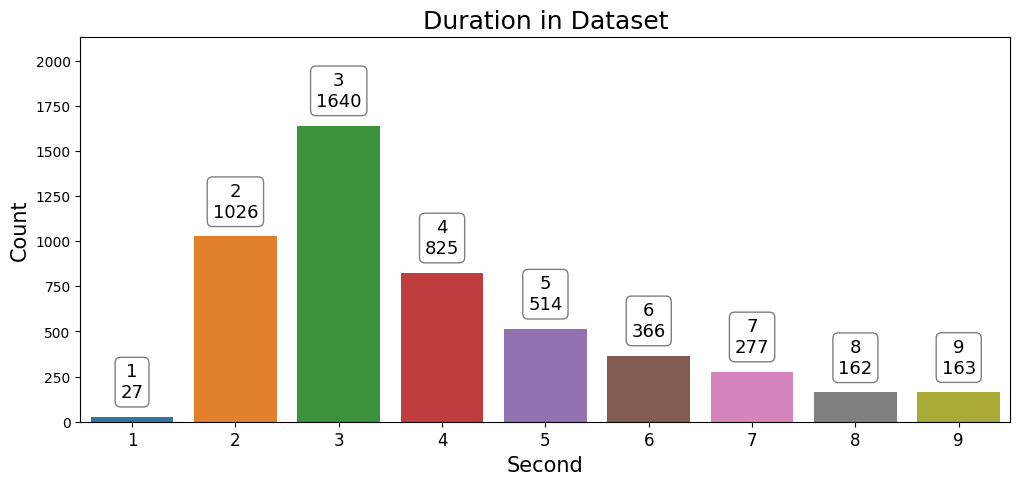

In [52]:
# Visualize duration in dataset
vis_dur_data(df, "Duration in Dataset", DUR_COLUMN)

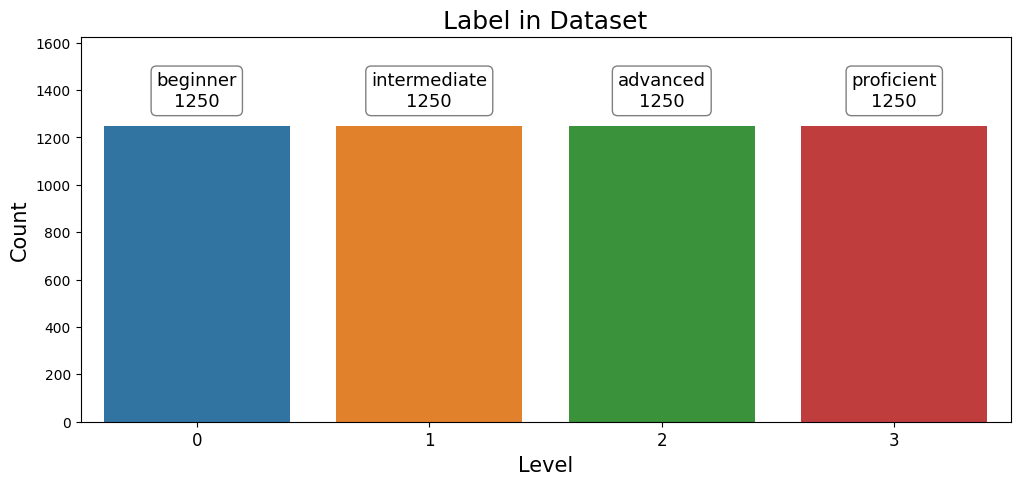

In [53]:
# Visualize label in dataset
vis_len_data(df, "Label in Dataset", LABEL_COLUMN)

<div class="markdown-google-sans">

## **Push Dataset to Hub 🥳**
</div>

After doing the whole process I'm going to save the dataset to [Hugging Face Dataset Hub](https://huggingface.co/datasets). To save the dataset in [Hugging Face Dataset Hub](https://huggingface.co/datasets), first I must login into Hugging Face Hub. To login into Hugging Face Hub I just call the [`notebook_login`](https://huggingface.co/docs/huggingface_hub/main/en/package_reference/login#huggingface_hub.notebook_login) function and copy the token into this notebook.

In [54]:
# Hugging Face login
notebook_login()

After successful login into Hugging Face Hub, last I can save the dataset to [Hugging Face Dataset Hub](https://huggingface.co/datasets) just call the [`push_to_hub`](https://huggingface.co/docs/huggingface_hub/main/en/guides/upload#pushtohub) in dataset and set dataset name and private value.

In [55]:
# Push dataset to hub
dataset.push_to_hub(TARGET_HUGGING_FACE_DATASET_NAME, private=PRIVATE)

Map:   0%|          | 0/2500 [00:00<?, ? examples/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/2 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/25 [00:00<?, ?ba/s]

Map:   0%|          | 0/2500 [00:00<?, ? examples/s]

Creating parquet from Arrow format:   0%|          | 0/25 [00:00<?, ?ba/s]

Now dataset is ready to use for fine tune some task. Now this dataset is available in my Hugging Face Hub profile [hafidikhsan](https://huggingface.co/hafidikhsan).